# Bootcamp

Bienvenidos.

Antes de realizar los ejercicios consultar sobre lo siguiente:

El primer conjunto de ejercicios cubre los temas de manipulación básica de imágenes, resolución espacial y resolución del nivel de intensidad.

El segundo conjunto de ejercicios cubre los temas de mejora de imágenes en el dominio espacial, transformaciones de leyes de potencia, ecualización de histogramas, suavizado, filtros medianos, nitidez de imágenes, laplaciano de una imagen, gradientes de imagen y operadores de Sobel.

El tercero es un ejercicio para aplicar conicimientos de tecnologías web.

Debe probar sus funciones con varias imágenes de entrada, además de las proporcionadas aquí. Incluya las imágenes de entrada y salida que utilizó para la experimentación.

En la siguiente celda se importan las bibliotecas necesarias, se definen ciertas variables globales como la ruta a las imágenes, una lista con las imágenes a utilizar y una función global llamada *get_image*, que devuelve la imagen como un array numpy (para acortar los códigos de los apartados siguientes).

Las imagenes que pueden usar son las siguientes: ['descarga (1).png', 'descarga.jpg', 'descarga.png', 'descarga1copia.png', 'images.png']


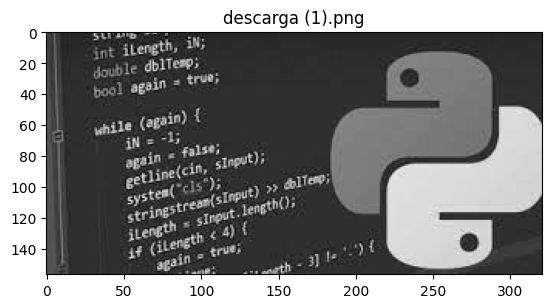

In [73]:
'''This is a definition script, so we do not have to rewrite code'''
import os
import numpy as np
import cv2
import matplotlib.pyplot as mplt

# set matplotlib to print inline (Jupyter)
%matplotlib inline

# path prefix
pth = './data'
out_pth = 'data_copias/'
if not os.path.exists(out_pth):
    os.makedirs(out_pth)
    print("Directorio creado: ", out_pth)
# Lista de imágenes a ser usadas
filenames = sorted(os.listdir(pth))
# Diccionario *files*
files = dict([(filename,  os.path.join(pth, filename)) for filename in filenames])
count = 0
# Función de ayuda para obtener imagenes
def get_image(img_path):
    return cv2.imread(files[img_path], cv2.IMREAD_GRAYSCALE)

# Las llaves de las imagenes son las siguientes
print(f"Las imagenes que pueden usar son las siguientes: {filenames}")

# Para usar una imagen se puede usar la función de ayuda
img = get_image("descarga.jpg")
mplt.figure()
mplt.imshow(img, cmap='gray')
mplt.title(filenames[0])
cv2.imwrite(out_pth + 'descarga.jpg',img)
count +=1

## Ejercicios
Para Realizar los siguientes ejercicios puede utilizar la función get_image, definida anteriormente para obtener la iamgen que deseé.
Los siguientes conocimientos son necerarios para realizar los ejercicios: 
- Representación de una imágen:
    Las imagenes cuando son cargadas en memoria con Opencv se representan por una matriz de numpy. Cada elemento de la matriz es entonces un valor entre 0 y 255 para imagenes a blanco y negro.
    Las imagenes pueden ser cargadas a blanco y negro con los siguiente:
    
        cv2.imread(pth+img_path, cv2.IMREAD_GRAYSCALE)

- Funciones básicas con numpy
- Funciones basicas con Matplotlib
- Funciones básicas con Opencv
- Histograma / ecualización de histograma
- Aplicación de filtros a imagenes con máscaras
- Transformación de ley de potencia en imágenes

### CV Basicos

1. [*] Cargue la imagen desde un archivo y visualice la imagen. Determinar y mostrar el tamaño de la imagen. Finalmente, guarde una nueva copia de la imagen en un archivo nuevo.

2. Escriba las siguientes funciones
    - Escriba una función *rotar_imagen*, que volteé una imagen ya sea vertical u horizontalmente. La función debe tomar dos parámetros de entrada: la matriz que almacena los datos de la imagen y una bandera para indicar si la imagen debe voltearse vertical u horizontalmente. Utilice esta función para voltear una imagen de ejemplo tanto vertical como horizontalmente. **Sugerencia**: puede usar la indexación de matrices de numpy o la función [flip](https://docs.opencv.org/2.4/modules/core/doc/operations_on_arrays.html#flip) de OpenCV para resolver este problema.
    - Escribe una función para generar el negativo de una imagen. Esto significa que se crea una nueva imagen en la que los valores de píxel iguales a el valor máximo de  pixel menos el valor de píxel de la imagen original.

4. Escribir las Siguientes funciones
 - Escriba una función que calcule el nivel de intensidad promedio de una imagen. Use esta función en imágenes de ejemplo y discuta sus resultados.
 - Escriba una función realize umbralizado a una imagen en en base un nivel de umbral dado como parámetro de la función. La función debe tomar dos parámetros: la imagen a umbralizar y el nivel de umbral. El resultado de la función debería ser una nueva imagen umbralizada.
 - Escriba una función que tome una imagen como su único parámetro y relize el umbralizado a esta imagen en función del valor de intensidad promedio de las imágenes. Sugerencia: simplemente escriba una nueva función que use las dos funciones recién escritas.

5. Escriba una función que submuestree una imagen en escala de grises de tamaño 512x512 por factores de 2, es decir, 256, 128, 64 y muestre sus resultados. Puede simplemente submuestrear, promediar, etc.



### CV Intermedio

1. Implemente el código para una función que ejecuta la ecualización de histogramas en una imagen en escala de grises. Su código debe calcular el histograma de la imagen y usar la **cdf** (Función de distribución acumulativa) como una función de transformación. La función debería devolver la imagen ecualizada como una matriz. Utilice la función para realizar la ecualización del histograma en las imágenes darkPollen.jpg, lightPollen.jpg, lowContrastPollen.jpg, pollen.jpg, spine.jpg y runway.jpg. Incluya gráficos y comparaciones entre los histogramas de las imágenes corregidas con los de los originales. También incluya una gráfica de la función de transformación que iguala los histogramas de entrada.

    Para resolver este punto, debe crear una función que recibe una array de la imagen a la que se le quiere aplicar la ecualización de histograma como parametro. A la imagen se le hallan los valores del histograma, con esos valores se construye la cdf para los valores del histograma que no son cero. Luego se obtienen los valores de intensidad de píxeles que se encuentran en la imagen, para establecer una correspondencia entre estos y la cdf. Luego se aplica la siguiente función a cada valor de píxel en la imagen:

    $$ H(x,y) = {(cdf(v)-cdfmin) \over N \cdot M-1} $$

    Donde $H(x,y)$ es el nuevo valor del píxel, $cdf(v)$ es el valor de la cdf en la intensidad de píxel $v$, $cdfmin$ es el valor mínimo de la cdf, L es el valor máximo de intensidades de pixel y $N$ y $M$ son las dimensiones del array. Despues de lo anterior se debe devolver la imagen con la transformación realizada.



2. Implemente el código para la siguiente función que realiza una transformación de ley de potencia en una imagen. Esta función debe tomar una imagen y el valor gamma que se usará en la transformación como sus únicos parámetros de entrada. La función debe devolver una nueva matriz de imágenes que es la transformación de potencia de la imagen original. Las transformaciones de ley de potencia se logran utilizando la siguiente fórmula:

    $$ g(x,y) = T[f(x,y)] = c \cdot f(x,y)^\gamma $$

    Donde $g(x,y)$ es el valor del píxel de resultante, $f(x,y)$ es el valor del píxel original, $\gamma$ es el parámetro que controla la transformación de la ley de potencia y $c$ es una constante que generalmente se establece en 1. Tenga en cuenta que se debe convertir la imagen para que los valores de intensidad estén en el rango de 0.0 a 1.0, en lugar de 0 a 255.

    Pruebe esta nueva función en las imágenes spine.jpg y runway.jpg, experimentando con diferentes valores.



3. Implemente una función que suavice una imagen de entrada con una máscara de filtro de promedio de tamaño $n$.  La función debe tomar dos entradas: una matriz de imagen y el tamaño del filtro $n$. Usa la imagen test_pattern_blurring_orig.tif para probar tu algoritmo. Use máscaras de filtro de promedio de tamaños $n=3,5,9,15,35$.



4. Considere la imagen *ckt_board_saltpep_prob_pt05.png*. Se ha corrompido con ruido de *"sal y pimienta"* (más formalmente conocido como ruido de impulso). Intente eliminar el ruido de esta imagen aplicando un filtro mediano de tamaño 3x3. Compare el resultado con la aplicación de un filtro promedio de tamaño 3x3. Aumente el tamaño del kernel a 3x3, 5x5, 9x9, 15x15.

### Web [*]
Use event listener de javascript para agregar sonidos de notas en un diseño de un piano.
- Construye todo el diseño con solo css y html.
- Agregue listeners para iniciar todos los sonidos, encuentre los recursos de sonido en la carpeta de notas
- Habilite eventos de clic o teclado para una experiencia de usuario adecuada
- Empuje todo el ejemplo en su repositorio de github.
Nota: las notas del piano están dispuestas de la siguiente forma:
![piano](./piano_notes.png)
Se debe contar al final del ejercicio con tres archivos con formatos .html, .css y .js.